# Preparations

### Fetches the required packages

In [12]:
using SimulationSupport
using Plots
using Statistics
using StatsPlots
using DelimitedFiles
gr(); default(fmt = :png);

### File manipulation

In [13]:
# Loads from a single file.
function load_data(nametag,lysozyme,sigV)
    return readdlm(data_folder*"stochastic_bifurcation_diagram/"*string(nametag)*"/solutions_"*string(lysozyme)*"_"*string(sigV)*".csv", ',', Float64, '\n')
end
# Loads from several files, across a set of folders
function load_data(nametag,subfolders,lysozyme,sigV)
    data = zeros(0,1001)
    for subfolder in subfolders
        !isfile(data_folder*"stochastic_bifurcation_diagram/"*subfolder*"/solutions_"*string(lysozyme)*"_"*string(sigV)*".csv") && continue
        data = [data; readdlm(data_folder*"stochastic_bifurcation_diagram/"*subfolder*"/solutions_"*string(lysozyme)*"_"*string(sigV)*".csv", ',', Float64, '\n')]
    end
    return data
end;

### Data processing functions

In [14]:
function mean_dist_after_delay(sols,delay)
    delay_values = map(idx -> sols[idx,delay], 1:size(sols)[1])
    dists = map(idx -> abs(delay_values[idx]-sols[idx,1]), 1:size(sols)[1])
    return mean(dists)
end
function mean_dist_after_delay_3(sols,d1,d2,d3)
    dv1 = map(idx -> sols[idx,d1], 1:size(sols)[1])
    dv2 = map(idx -> sols[idx,d2], 1:size(sols)[1])
    dv3 = map(idx -> sols[idx,d3], 1:size(sols)[1])
    dv = (dv1.+dv2.+dv3)./3
    dists = map(idx -> abs(dv[idx]-sols[idx,1]), 1:size(sols)[1])
    return mean(dists)
end
function mean_mean_dist(sols)
    mean_dists = map(idx -> mean(abs.(sols[idx,1].-sols[idx,:])), 1:size(sols)[1])
    return mean(mean_dists)
end;
function mean_mean_dist_frac(sols)
    mean_dists = map(idx -> mean(abs.(sols[idx,1].-sols[idx,:])), 1:size(sols)[1])
    fracs = map(idx -> sols[idx,1]/mean_dists[idx], 1:size(sols)[1])
    return mean(fracs)
end
function mean_count_less_more(sols)
    count_diff = map(idx -> abs(count(sols[idx,:].>sols[idx,1])-count(sols[idx,:].<sols[idx,1])), 1:size(sols)[1])
    return mean(count_diff)
end
function tot_count_less_more(sols)
    count_diff = map(idx -> count(sols[idx,:].>sols[idx,1])-count(sols[idx,:].<sols[idx,1]), 1:size(sols)[1])
    return sum(count_diff)/(size(sols)[1]*size(sols)[2])
end
function full_CV(sols)
    all_values = vec(sols)
    for i = 1:1:size(sols)[1], j = 1:size(sols)[2]
        push!(all_values,sols[idx,:])
    end
    count_diff = map(idx -> count(sols[idx,:].>sols[idx,1])-count(sols[idx,:].<sols[idx,1]), 1:size(sols)[1])
    return sum(count_diff)/(size(sols)[1]*size(sols)[2])
end
function diff_meassure(vals)
    return minimum(count.([vals .> vals[1], vals .< vals[1]]))/(length(vals)/2)
end;

### Declares base parameters

In [15]:
data_folder = "../../../../../SIGV/first_model_simulation/Data/"
nametag = "main"
grid_L = 0.0125:0.025:1.9875
grid_σV = 0.05:0.1:24.95;

# Makes the stochastic bifurcation diagram

### Processes the data

In [37]:
folders = "split_" .* string.(1:8)
data_func = diff_meassure; pars = [];
distribution_1000 = Array{Float64}(undef, length(grid_σV), length(grid_L))
distribution_750 = Array{Float64}(undef, length(grid_σV), length(grid_L))
distribution_500 = Array{Float64}(undef, length(grid_σV), length(grid_L))
@time for i = 1:length(grid_L)
    print(grid_L[i], "   ")
    for j = 1:length(grid_σV)
        sols = load_data(nametag,folders,grid_L[i],grid_σV[j])
        distribution_1000[j,i] = data_func([sols...],pars...)
        distribution_750[j,i] = data_func([sols[:,1:750]...],pars...)
        distribution_500[j,i] = data_func([sols[:,1:500]...],pars...)
    end
end    

0.0125   0.0375   0.0625   0.0875   0.1125   0.1375   0.1625   0.1875   0.2125   0.2375   0.2625   0.2875   0.3125   0.3375   0.3625   0.3875   0.4125   0.4375   0.4625   0.4875   0.5125   0.5375   0.5625   0.5875   0.6125   0.6375   0.6625   0.6875   0.7125   0.7375   0.7625   0.7875   0.8125   0.8375   0.8625   0.8875   0.9125   0.9375   0.9625   0.9875   1.0125   1.0375   1.0625   1.0875   1.1125   1.1375   1.1625   1.1875   1.2125   1.2375   1.2625   1.2875   1.3125   1.3375   1.3625   1.3875   1.4125   1.4375   1.4625   1.4875   1.5125   1.5375   1.5625   1.5875   1.6125   1.6375   1.6625   1.6875   1.7125   1.7375   1.7625   1.7875   1.8125   1.8375   1.8625   1.8875   1.9125   1.9375   1.9625   1.9875   9970.531824 seconds (5.88 G allocations: 263.219 GiB, 0.31% gc time)


In [36]:
[sols[:,1:750]...]

63000-element Array{Float64,1}:
 0.07610669768707465
 0.07610669768707465
 0.07610669768707465
 0.07610669768707465
 0.06282875002026625
 0.06282875002026625
 0.06282875002026625
 0.06282875002026625
 0.08258860504405507
 0.08258860504405507
 0.08258860504405507
 0.08258860504405507
 0.04383411693289786
 ⋮
 0.23902484083637762
 0.060759200234535175
 0.159648694364993
 0.24877147690984536
 0.21040761075296668
 0.3292524684477803
 0.2192082242384968
 0.24173271850131045
 0.30613201947124885
 0.02547859387627946
 0.17045507541178206
 0.26923727365265054

In [41]:
cgrade = cgrad([ :blue, :green, :yellow, :orange,:red])
xlabel = "Lysozyme stress amount"
ylabel = "σV concentration"
heatmap(grid_L, grid_σV, distribution_1000, c=cgrade, xlabel=xlabel, ylabel=ylabel)

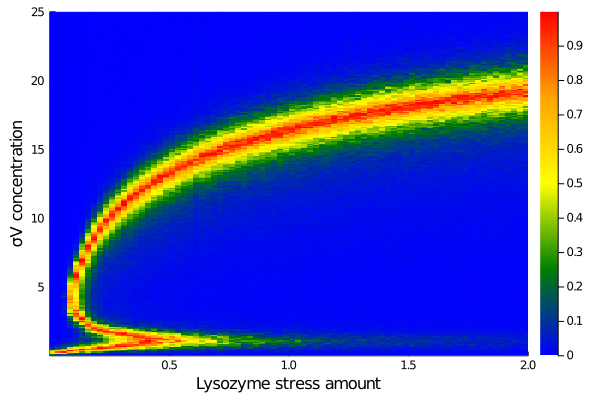

In [39]:
cgrade = cgrad([ :blue, :green, :yellow, :orange,:red])
xlabel = "Lysozyme stress amount"
ylabel = "σV concentration"
heatmap(grid_L, grid_σV, distribution_750, c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [40]:
cgrade = cgrad([ :blue, :green, :yellow, :orange,:red])
xlabel = "Lysozyme stress amount"
ylabel = "σV concentration"
heatmap(grid_L, grid_σV, distribution_500, c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [42]:
savefig("Stoch_bif_latest.png"); savefig("Stoch_bif_latest.svg");

In [27]:
cgrade = cgrad([ :blue, :green, :yellow, :orange,:red])
xlabel = "Lysozyme stress amount"
ylabel = "σV concentration"
heatmap(grid_L[1:60], grid_σV, distribution[:,1:60], c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [28]:
savefig("Stoch_bif_short.png"); savefig("Stoch_bif_short.svg");

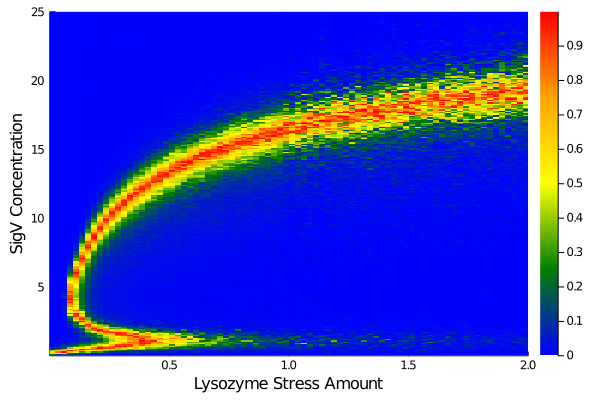

In [10]:
cgrade = cgrad([ :blue, :green, :yellow, :orange,:red])
xlabel = "Lysozyme Stress Amount"
ylabel = "SigV Concentration"
heatmap(grid_L, grid_σV, distribution, c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [11]:
savefig("stoch_bif.png")

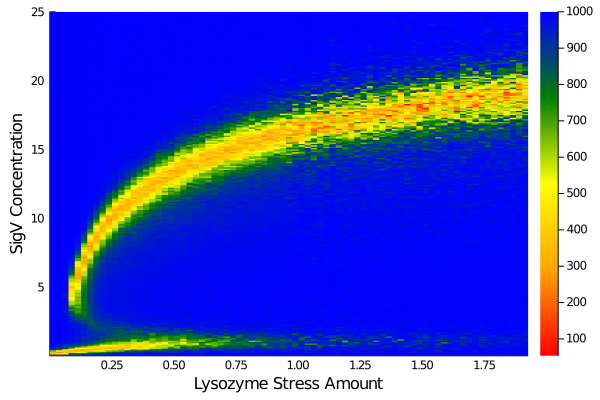

In [57]:
cgrade = cgrad([:red, :orange, :yellow, :green, :blue])
xlabel = "Lysozyme Stress Amount"
ylabel = "SigV Concentration"
heatmap(grid_L, grid_σV, distribution, c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [58]:
savefig("stoch_bif.png")

### Plots the diagram

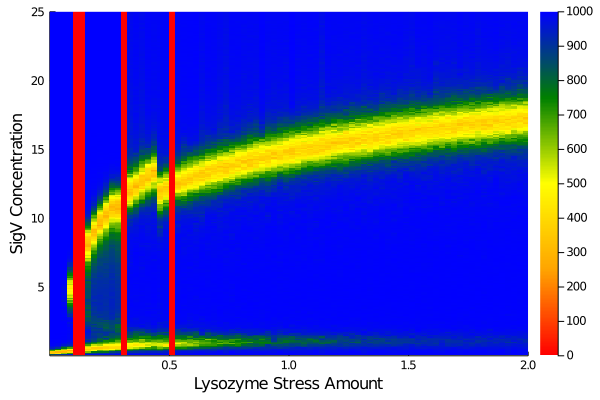

In [6]:
cgrade = cgrad([:red, :orange, :yellow, :green, :blue])
xlabel = "Lysozyme Stress Amount"
ylabel = "SigV Concentration"
heatmap(grid_L, grid_σV, distribution, c=cgrade, xlabel=xlabel, ylabel=ylabel)

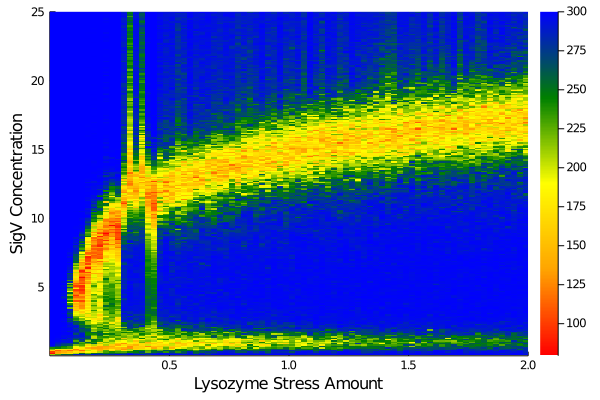

In [18]:
cgrade = cgrad([:red, :orange, :yellow, :green, :blue])
xlabel = "Lysozyme Stress Amount"
ylabel = "SigV Concentration"
heatmap(grid_L, grid_σV, distribution, c=cgrade, xlabel=xlabel, ylabel=ylabel)

In [19]:
heatmap(grid_L, grid_σV, distribution, c=cgrade, xlabel=xlabel, ylabel=ylabel, xlimit = (0.25,0.45))